### __📊 1. Daten einlesen und Überblick verschaffen__

In [ ]:
import pandas as pd

# CSV einlesen 
df = pd.read_csv("../data/customers.csv")

# Überblick über Spalten und erte Zeilen
df.head()

,customer_id,is_user,age,contract_type,device_os,uses_selfservice,monthly_spend,support_calls,data_volume_gb
0,CUST00000,1,37,Postpaid,Android,1,40.73,1,1.64
1,CUST00001,1,32,Postpaid,Android,1,30.00,0,13.83
2,CUST00002,1,39,Postpaid,iOS,1,47.45,0,12.22
3,CUST00003,1,46,Postpaid,Android,1,22.63,2,28.71
4,CUST00004,1,32,Postpaid,Android,1,72.47,0,0.79


### __🔍 2. Grundstruktur prüfen__

In [4]:
# Spaltennamen und Datentypen
df.info()

#Anzahl der Zeilen und Spalten
print(f"Form:{df.shape}")

# Gibt es fehlende Werte?
print("Fehlende Werte:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   is_user           5000 non-null   int64  
 2   age               5000 non-null   int64  
 3   contract_type     5000 non-null   object 
 4   device_os         5000 non-null   object 
 5   uses_selfservice  5000 non-null   int64  
 6   monthly_spend     5000 non-null   float64
 7   support_calls     5000 non-null   int64  
 8   data_volume_gb    5000 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 351.7+ KB
Form:(5000, 9)
Fehlende Werte:
customer_id         0
is_user             0
age                 0
contract_type       0
device_os           0
uses_selfservice    0
monthly_spend       0
support_calls       0
data_volume_gb      0
dtype: int64


### __📈 3.Nuter vs. Nicht-Nutzer - Verteilung__

<Axes: title={'center': 'Anteil Nichtnutzer vs. Nutzer'}, xlabel='is_user'>

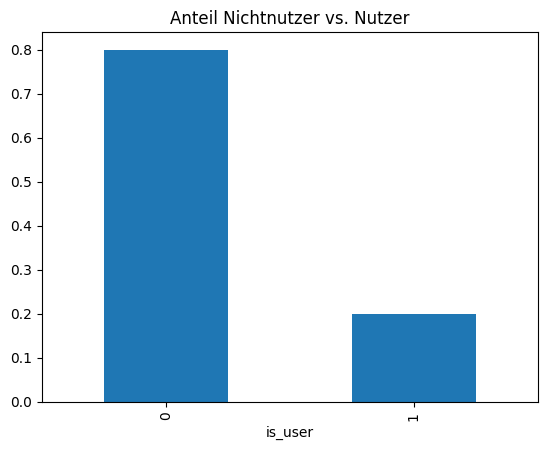

In [6]:
# Nutzerverteilung
df["is_user"].value_counts(normalize=True).plot(kind="bar", title="Anteil Nichtnutzer vs. Nutzer")

### __📊 4. Statistische Zusammenfassung__

In [7]:
# Numerische Variablen: Zusammenfassung
df.describe()

# Nach Nutzerstatus getrennt vergleichen
df.groupby("is_user")[["age", "monthly_spend", "support_calls", "data_volume_gb"]].mean()

,age,monthly_spend,support_calls,data_volume_gb
is_user,,,,
0,44.51775,40.04811,2.504,3.982073
1,33.65500,40.88204,0.926,7.756410


### __📉 5. Korrelationen analysieren (Heatmap)__

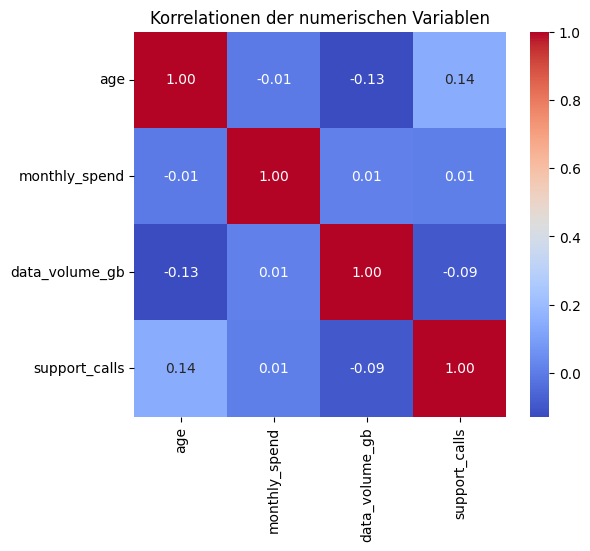

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste der numerischen Variablen
numeric_cols = ["age", "monthly_spend", "data_volume_gb", "support_calls"]

# Korrelationen berechnen & visualisieren
plt.figure(figsize=(6, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationen der numerischen Variablen")
plt.show()

### __Multivariate Muster erkennen__

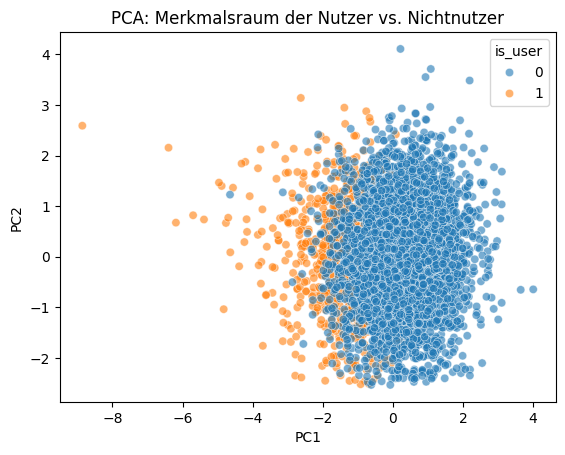

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Numerische Daten normalisieren
X = df[numeric_cols]
X_scaled = StandardScaler().fit_transform(X)

# PCA: 2 Hauptkomponenten
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Ergebnis plotten
pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df["is_user"] = df["is_user"]

sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="is_user", alpha=0.6)
plt.title("PCA: Merkmalsraum der Nutzer vs. Nichtnutzer")
plt.show()

In [12]:
users = df["is_user"].sum()
total = len(df)
print(f"Nutzeranteil: {users / total:.2%}")
print(f"Nicht-Nutzer: {(total - users) / total:.2%}")

Nutzeranteil: 20.00%
Nicht-Nutzer: 80.00%
